In [1]:
from pathlib import Path
import torch
import torchvision.transforms as T

from hydra.utils import instantiate

from utils.notebooks import load_model
from utils.img import unnormalize
from utils.visualization import plot_feats

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
project_root = str(Path().absolute())

In [3]:
from PIL import Image

# Load an image
latent_w = 24 # 32
latent_h = 18 # 20
patch_size = 16
input_w = latent_w * patch_size
input_h = latent_h * patch_size

image_path = "/root/workspaces/thesis_ws/data/IMG_9212.jpg"
image = Image.open(image_path).convert("RGB")

print("Image shape:", image.size)

# Transform the image to match the input requirements of the model
mean = torch.tensor([0.485, 0.456, 0.406], device=device)
std = torch.tensor([0.229, 0.224, 0.225], device=device)
# transform = T.Compose(
#     [
#         T.Resize(img_size),
#         T.CenterCrop(img_size),
#         T.ToTensor(),  # Convert to tensor
#         T.Normalize(mean=mean, std=std),  # Normalize
#     ]
# )
transform = T.Compose(
    [
        T.Resize((input_h, input_w)),
        T.ToTensor(),  # Convert to tensor
        T.Normalize(mean=mean, std=std),  # Normalize
    ]
)
image_batch = transform(image).unsqueeze(0).to(device)  # Add batch dimension and move to device

print("Image batch shape:", image_batch.shape)

Image shape: (4032, 3024)
Image batch shape: torch.Size([1, 3, 288, 384])


In [4]:
backbone = "vit_small_patch16_dinov3.lvd1689m"

model, backbone = load_model(backbone, project_root)

In [5]:
lr_feats, _ = backbone(image_batch)

In [6]:
hr_feats = model(image_batch, lr_feats, (input_h, input_w))

In [7]:
unorm_img_batch = unnormalize(image_batch, mean, std)

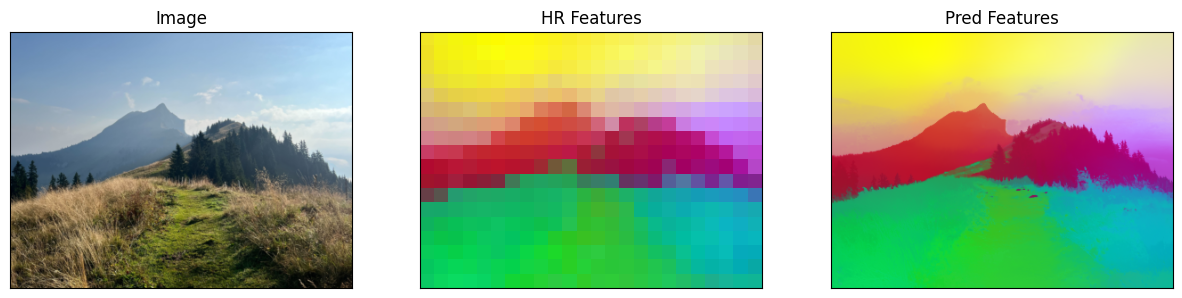

In [8]:
plot_feats(unorm_img_batch[0],lr_feats[0],hr_feats[0])

In [9]:
plot_feats(unorm_img_batch[0],lr_feats[0],hr_feats[0], save_individual=True, save_path="/root/workspaces/thesis_ws/data")